<a href="https://colab.research.google.com/github/azhar258/BITS.Mtech/blob/main/MLWebinar_Linear_Regression_18Nov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
print('Hello')

Hello


In [40]:
import numpy as np
import matplotlib.pyplot as mtp
import pandas as pd

%matplotlib inline

In [41]:

data_set = pd.read_csv('/content/BITS.Mtech/Data/salary_Data.csv') # Uncomment and adjust path once file is located
data_set

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [42]:
data_set.shape

(30, 2)

In [43]:
# check any null is there
data_set.isnull().sum()

,0
YearsExperience,0
Salary,0


In [44]:
x = data_set.iloc[:, :-1].values
x
y = data_set.iloc[:, -1].values
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

<function matplotlib.pyplot.show(close=None, block=None)>

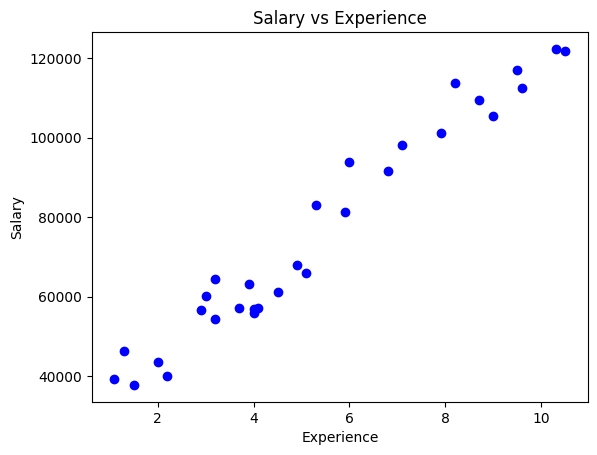

In [45]:
mtp.scatter(x,y, color='blue')
mtp.title('Salary vs Experience')
mtp.xlabel('Experience')
mtp.ylabel('Salary')
mtp.show

In [48]:
# /spilt data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=0)

x_test



array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5],
       [ 8.7],
       [ 9.6],
       [ 4. ],
       [ 5.3],
       [ 7.9]])

In [50]:
# fitting the simple linear regression model to the training dataset
from sklearn.linear_model import LinearRegression

# create model
model = LinearRegression()
# fit the model
model.fit(x_train, y_train)


LinearRegression()

In [51]:
# r-square value
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.9565349708076958


In [54]:
print('Slope coefficient: ', model.coef_)
print('Intercept: ', model.intercept_)

Slope coefficient:  [9345.94244312]
Intercept:  26816.192244031183


In [60]:
# prediction of test and trainig set result
x_pred = model.predict(x_train)
x_pred
y_pred = model.predict(x_test)
y_pred

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

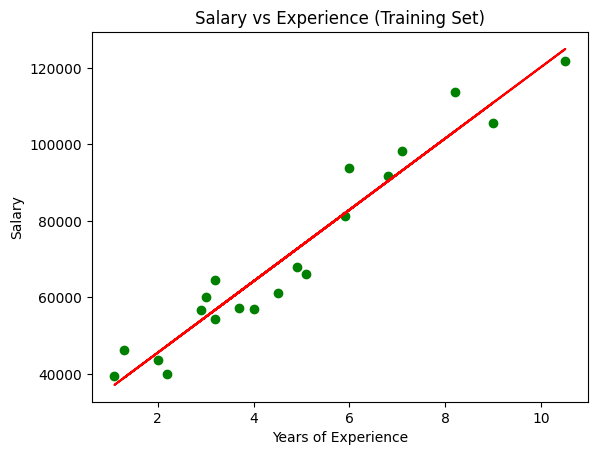

In [62]:
# visualize the fitted regression line
mtp.scatter(x_train, y_train, color='green')
mtp.plot(x_train, x_pred, color='red')
mtp.title('Salary vs Experience (Training Set)')
mtp.xlabel('Years of Experience')
mtp.ylabel('Salary')
mtp.show()

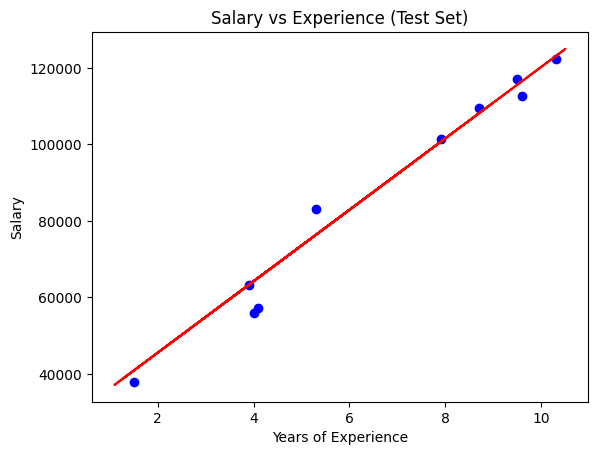

In [65]:
# visualise tthe test result
mtp.scatter(x_test, y_test, color='blue')
mtp.plot(x_train, x_pred, color='red')
mtp.title('Salary vs Experience (Test Set)')
mtp.xlabel('Years of Experience')
mtp.ylabel('Salary')
mtp.show()

In [66]:
# make predictions
X = np.atleast_1d(7).reshape(-1,1) #convert scalar to array
y_pred = model.predict(X)

print('for x=7 years of experience, predicted salary = ', y_pred)

for x=7 years of experience, predicted salary =  [92237.78934589]


In [67]:
y_test

array([ 37731., 122391.,  57081.,  63218., 116969., 109431., 112635.,
        55794.,  83088., 101302.])

In [68]:
y_pred

array([92237.78934589])

In [74]:
# performance measures
from sklearn.metrics import mean_squared_error, r2_score
# MSE
print('MSE: %f' % mean_squared_error(y_test, y_predict))
# variance
print('Variance score: %f' % r2_score(y_test, y_predict))

MSE: 21026037.329511
Variance score: 0.974915


# **Gradient Descent approach**

In [80]:
# on same data visualizing gradient descent for simple linear regression on salary

X = data_set['YearsExperience']
Y = data_set['Salary']

# Normalize features for better gradient descent perfoermance
X_mean = np.mean(X)
X_std = np.std(X)
X_norm = (X - X_mean) / X_std

# add intercept term  #
X_b = np.c_[np.ones(len(X_norm)), X_norm]

# Gradient Descent Prameters
learning_rate = 0.01
num_iterations = 1000
m = len(y)


30